# Salary Exploratory Data Analysis (EDA)

## Overview

This project is an Exploratory Data Analysis (EDA) of lists of salaries with additional information such as age, gender, years of experience, salary, and much more. You can get dataset on this [link](https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race)

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('Salary_Data_Based_country_and_race.csv')

## Data Cleansing

In [21]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


### Removing unnecessary column

In [22]:
df.drop(columns=['Unnamed: 0','Race'],axis=1,inplace=True)
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


### Dropping 'other' value in 'Gender column

In [23]:
df = df.drop(df[df['Gender'] == 'Other'].index,axis=0)

## Exploratory Data Analysis

In [26]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA
4,52.0,Male,Master's,Director,20.0,200000.0,USA
...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China


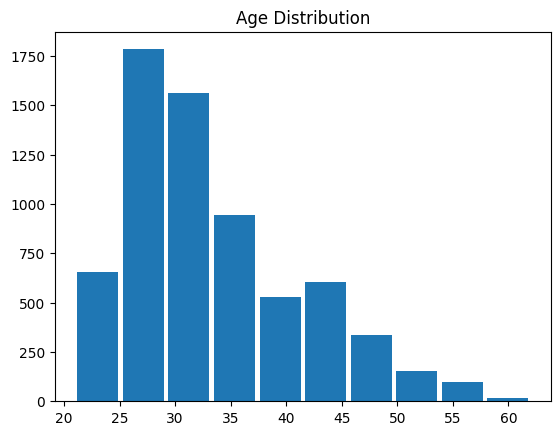

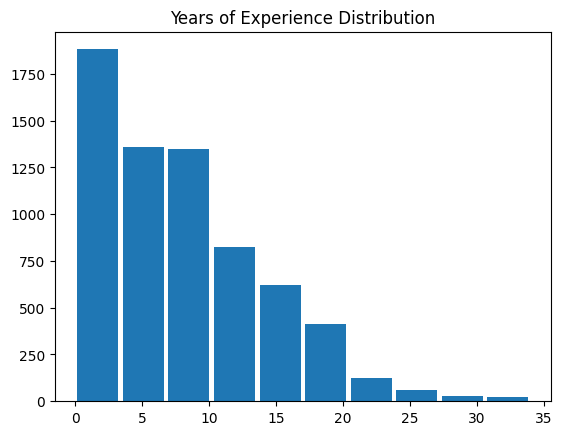

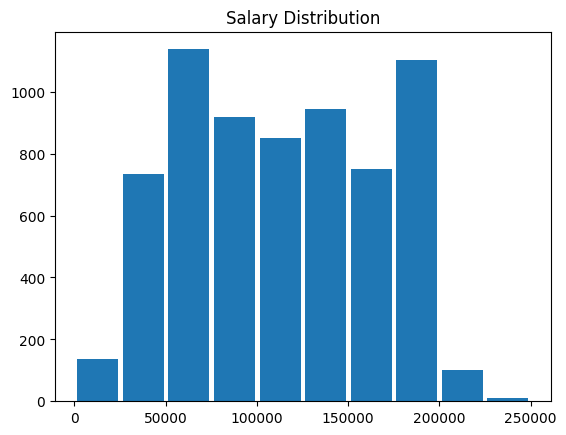

In [56]:
numeric_df = df[['Age','Years of Experience','Salary']]
for i in numeric_df.columns:
    plt.hist(df[i],rwidth=0.9)
    plt.title(label=str(i + ' Distribution'))
    plt.show()

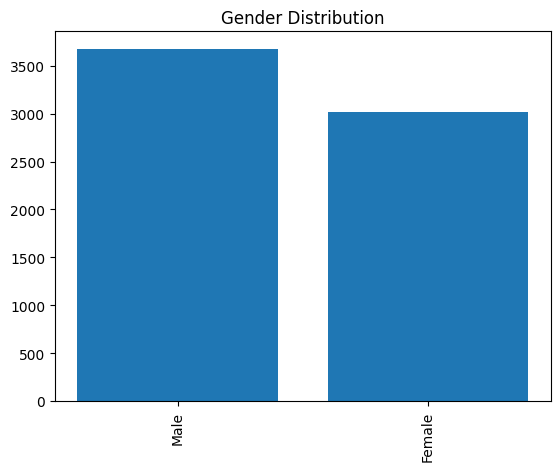

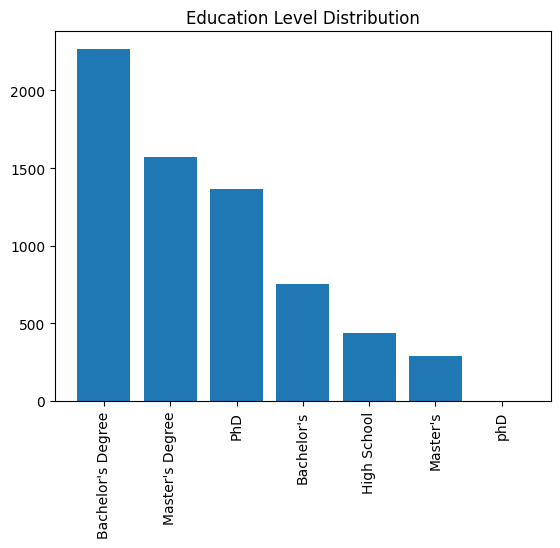

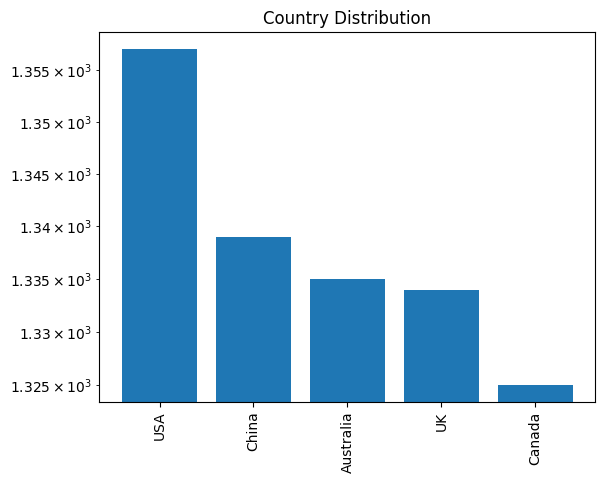

In [34]:
categorical_df = df[['Gender','Education Level','Country']]
for i in categorical_df.columns:
    counts = df[i].value_counts()
    plt.bar(x=counts.index, height=counts.values)
    if i == 'Country':
        plt.yscale('log')
    plt.title(label=str(i + ' Distribution'))
    plt.xticks(rotation=90)
    plt.show()

Text(0.5, 1.0, 'Correlation coef. between each numerical variable')

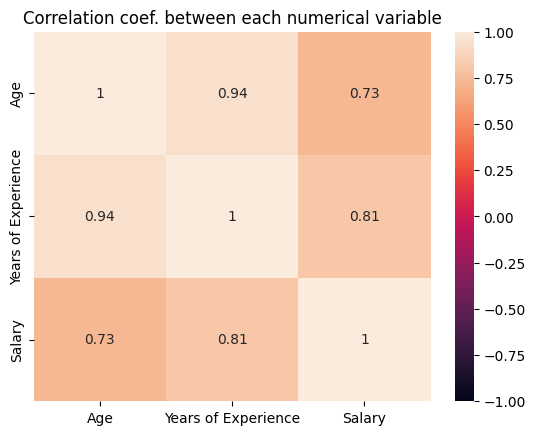

In [40]:
sns.heatmap(numeric_df.corr(),vmin=-1,vmax=1,annot=True)
plt.title(label='Correlation coef. between each numerical variable')

Text(3, 50, 'r = 0.73')

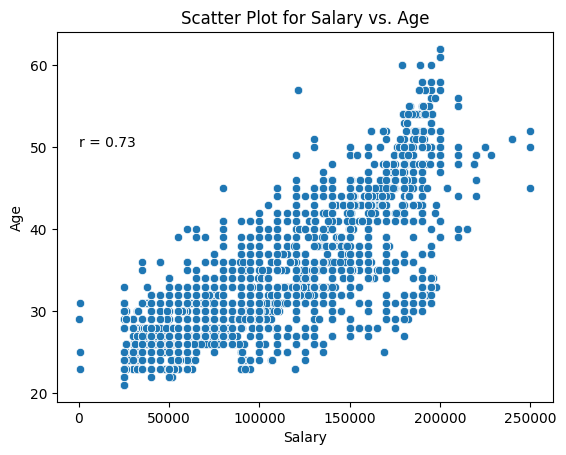

In [48]:
sns.scatterplot(x=df.Salary,y=df.Age)
plt.title(label='Scatter Plot for Salary vs. Age')
plt.text(3,50,'r = 0.73')